In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
import numpy as np
import plotly.express as px
import pandas as pd

In [68]:
t=np.linspace(0,1,26)
t2=np.linspace(-1,1,8)

f=1
sin1=np.sin(2*np.pi*f*t)
# plt.plot(t,sin1)

phases=np.array([0, 45, 90, 135, 180, 225, 270])*(2*np.pi/360)

mu=-0.25
sigma=0.5
swr=[-1,1]

u, sigma = 0, 0.5 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
numSamples=100
numClusters=len(phases)*len(swr)

data=np.zeros((numClusters*numSamples,len(t)+len(t2)))
clusters=np.linspace(1,numClusters,numClusters)
y_data=np.zeros((numClusters*numSamples,1))
i=0
j=0
for ph in phases:
    for swrResp in swr:
        phJitter=np.random.randint(-10,10,numSamples)*(2*np.pi/360)       
        for jitter in phJitter:
            sin1=np.sin(2*np.pi*f*t+ph+jitter)
            data[i,:len(t)]=sin1
            y_data[i]=clusters[j]
            if swrResp==1:
                data[i,len(t):]=np.exp(-(t2-mu+np.random.randn()/10)**2/(2*sigma**2))
            else:
                data[i,len(t):]=1-np.exp(-(t2-mu+np.random.randn()/10)**2/(2*sigma**2))
            i=i+1
        j=j+1

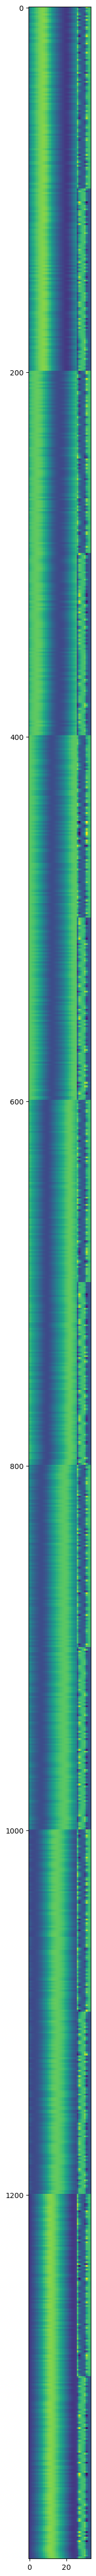

In [82]:
data=(data-np.mean(data, axis=0))/np.std(data,axis=0)

plt.figure(figsize=(20,50))
plt.imshow(data)
plt.tight_layout()

In [87]:
pca = PCA(n_components=3)
kernel_pca = KernelPCA(
    n_components=None, kernel="cosine", gamma=1/26, fit_inverse_transform=True, alpha=0.1
)

X_test_pca = pca.fit(data).transform(data)
X_test_kernel_pca = kernel_pca.fit(data).transform(data)

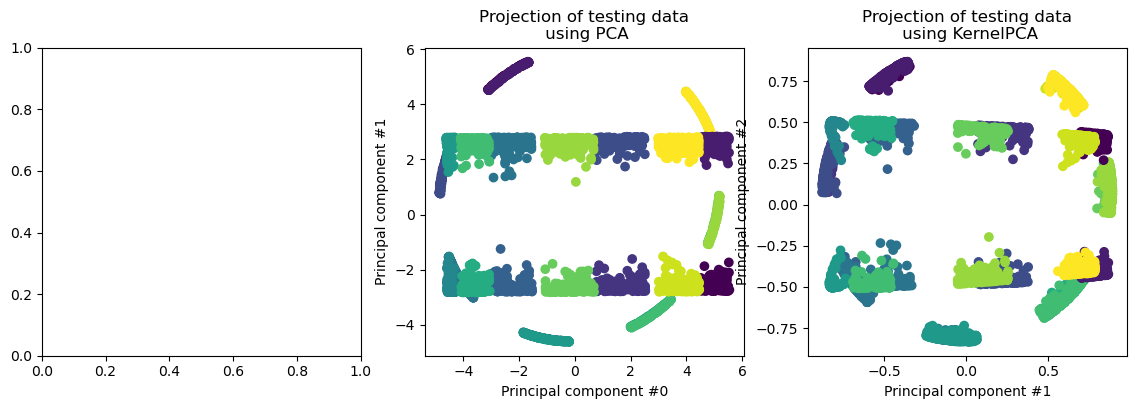

In [88]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_data)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")
pca_proj_ax.scatter(X_test_pca[:, 1], X_test_pca[:, 2], c=y_data)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_data)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")


kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 1], X_test_kernel_pca[:, 2], c=y_data)
kernel_pca_proj_ax.set_ylabel("Principal component #2")
kernel_pca_proj_ax.set_xlabel("Principal component #1")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

In [89]:
fig = px.scatter_3d(pd.DataFrame(np.concatenate((X_test_kernel_pca[:, :3], y_data), axis=1), columns=["pc1", "pc2", "pc3", "clusters"]), x="pc1", y="pc2", z="pc3",color="clusters" )
fig.show()

In [86]:
fig = px.scatter_3d(pd.DataFrame(np.concatenate((X_test_pca[:, :3], y_data), axis=1), columns=["pc1", "pc2", "pc3", "clusters"]), x="pc1", y="pc2", z="pc3",color="clusters" )
fig.show()


In [81]:
(data-np.mean(data, axis=0))/np.std(data,axis=0)

array([[-0.11670323,  0.26718843,  0.61300838, ...,  1.90523835,
         1.25275956,  1.06972291],
       [-0.16668037,  0.22057824,  0.57197345, ...,  0.25674883,
         0.90058592,  0.97821721],
       [-0.1416918 ,  0.24393555,  0.59258935, ...,  1.05094076,
         1.08584643,  1.02990205],
       ...,
       [-1.57263192, -1.44542787, -1.25117867, ..., -0.02671298,
        -0.84049091, -0.95982639],
       [-1.57263192, -1.44542787, -1.25117867, ...,  0.67363918,
        -0.64029233, -0.89351861],
       [-1.5517517 , -1.47352571, -1.32370838, ..., -1.04797989,
        -1.08559217, -1.02998018]])